Q1: Let $P$ be a random variable on $\{0, 1\}$, where $P = 0$ means a student fails and $P = 1$ means a student passes. \
    Let $Q$ be a random variable on $\{0, 1\}$, where $Q = 0$ means a student is slow and $Q = 1$ means a student is quick. \
    Then the proportion of students who answer this question quickly will pass the class is:\
    $Pr(P = 1 | Q = 1) = \frac{Pr(Q = 1 | P = 1)Pr(P = 1)}{Pr(Q = 1)} = \frac{Pr(Q = 1 | P = 1)Pr(P = 1)}{Pr(Q = 1 | P = 1)Pr(P = 1) + Pr(Q = 1 | P = 0)Pr(P = 0)} = \frac{0.6(0.9)}{0.6(0.9) + 0.3(1-0.9)} = $

In [1]:
0.6*0.9/(0.6*0.9 + 0.3*0.1)

0.9473684210526315

Q2: 
    Likelihood: $p(x|\theta, n) = c_1\Pi_{i = 1}^{k}\theta_i^{x_i}$, where $k$ is the length of the $x$ and $\theta$ vectors, and $c_1 \in {\rm I\!R} $ is a constant.\
    Prior: $p(\theta|\boldsymbol{\alpha}) = c_2\Pi_{i = 1}^{k}\theta_i^{\alpha_i -1}$, where $c_2 \in {\rm I\!R} $ is a constant.\
    Posterior: $p(\theta|x, n, \boldsymbol{\alpha}) = \frac{p(x|\theta, n)p(\theta|\boldsymbol{\alpha})}{p(x)} = \frac{(c_1\Pi_{i = 1}^{k}\theta_i^{x_i})(c_2\Pi_{i = 1}^{n}\theta_i^{\alpha_i -1})}{p(x)} = c_3 \Pi_{i = 1}^{k}\theta^{\alpha_i + x_i - 1} \sim Dir(\alpha + x)$, where $c_3 \in {\rm I\!R} $ is a constant.

Q3:

Text(0.5, 1.0, 'Barplot of cumulative number of occurences of each outcome')

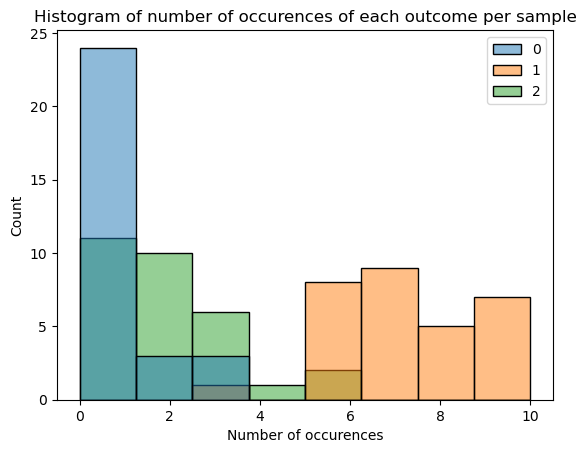

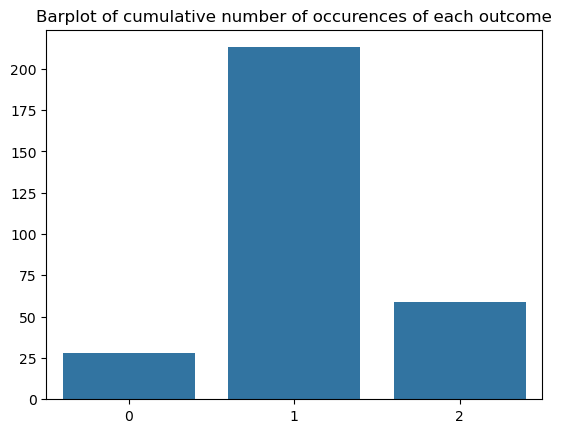

In [17]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.figure_factory as ff
np.random.seed(1009330298)
mult3 = stats.multinomial(10, [0.1, 0.7, 0.2])
mult3_samp = mult3.rvs(size = 30)
plt.figure()
hist = sns.histplot(mult3_samp)
hist.set_title("Histogram of number of occurences of each outcome per sample")
hist.set_xlabel("Number of occurences")
sums = mult3_samp.sum(axis = 0)
plt.figure()
sns.barplot(sums).set_title("Barplot of cumulative number of occurences of each outcome")

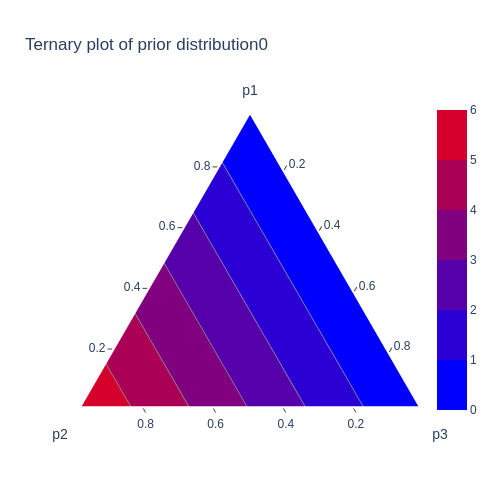

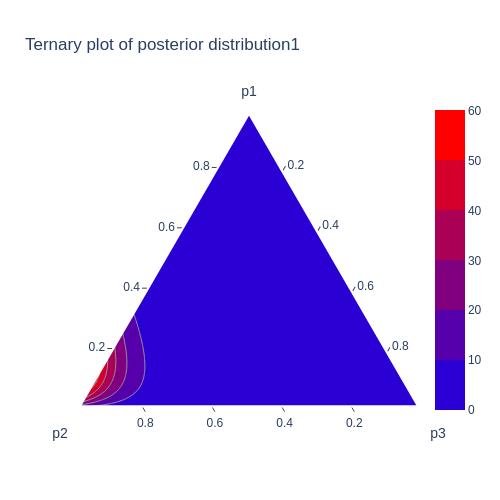

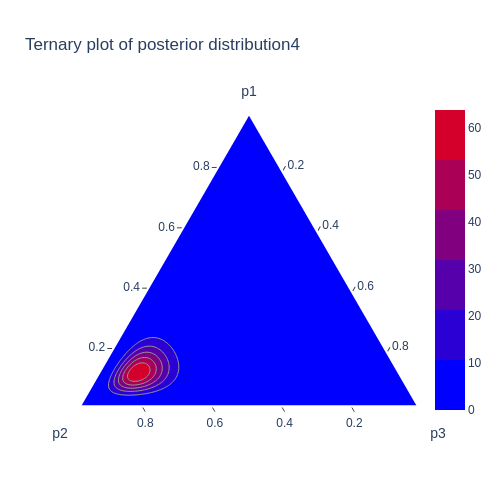

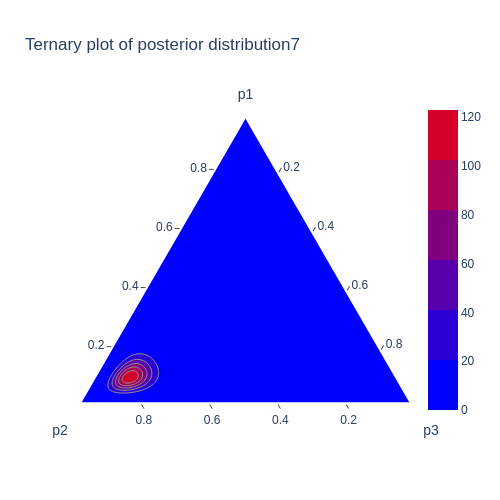

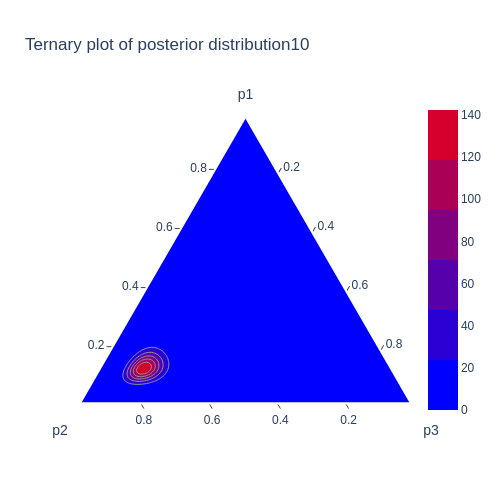

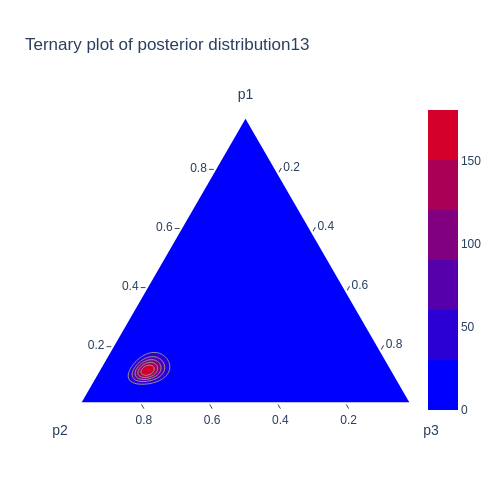

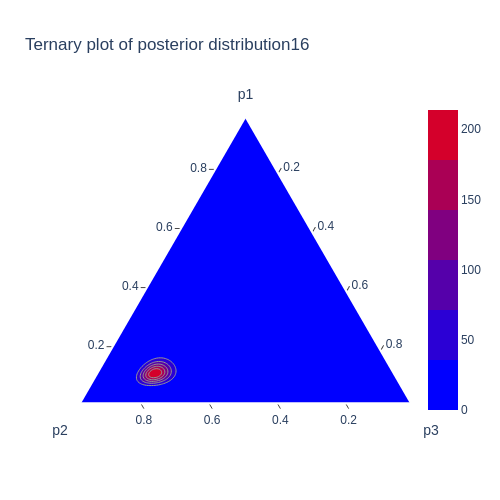

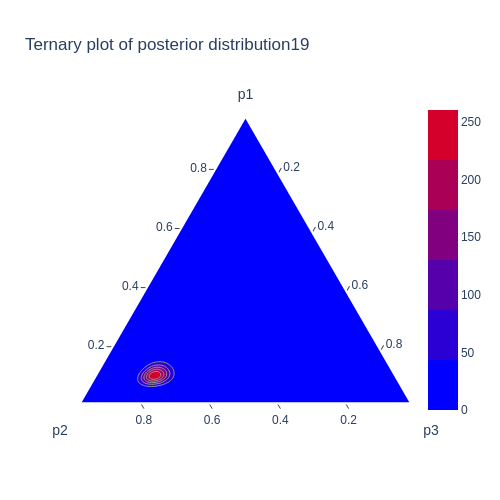

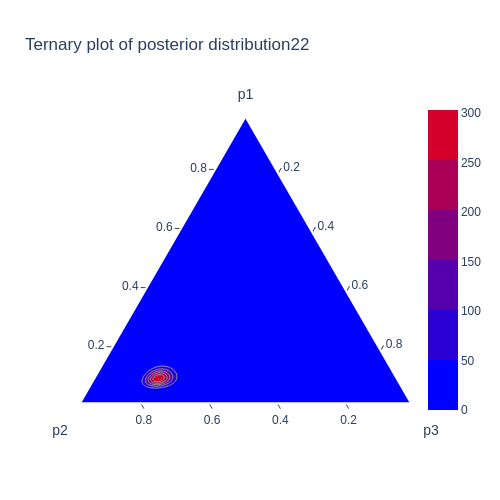

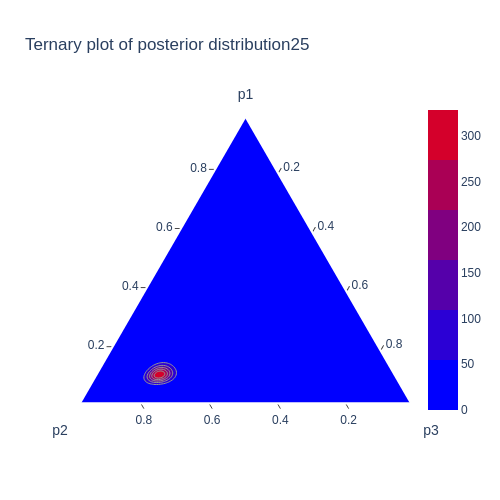

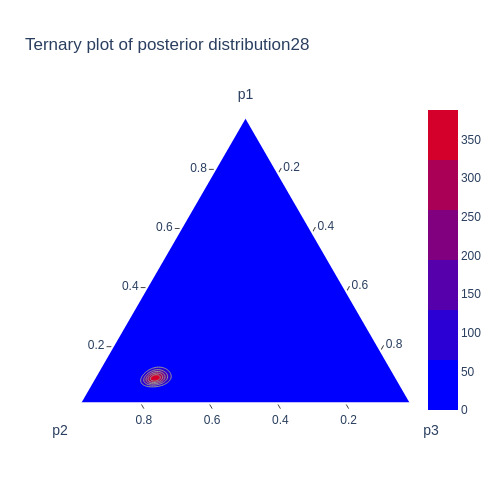

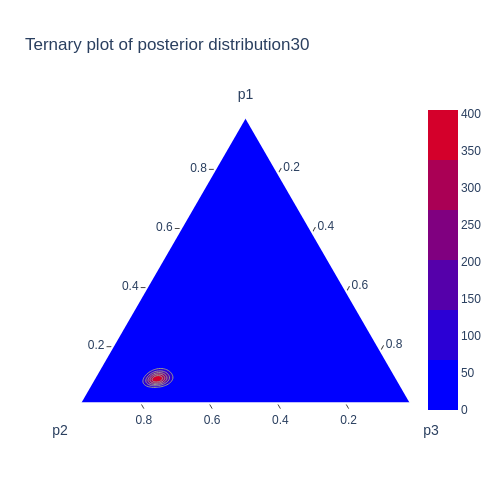

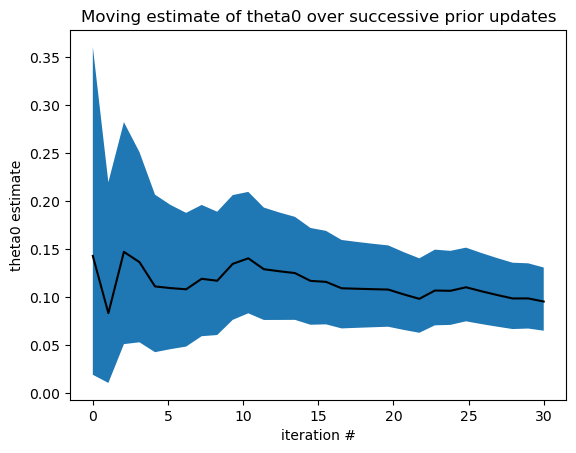

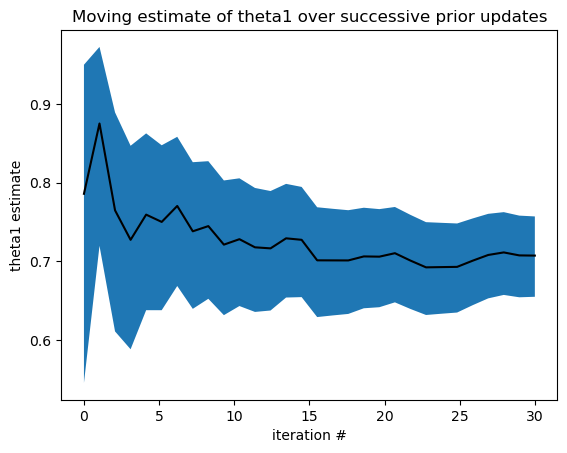

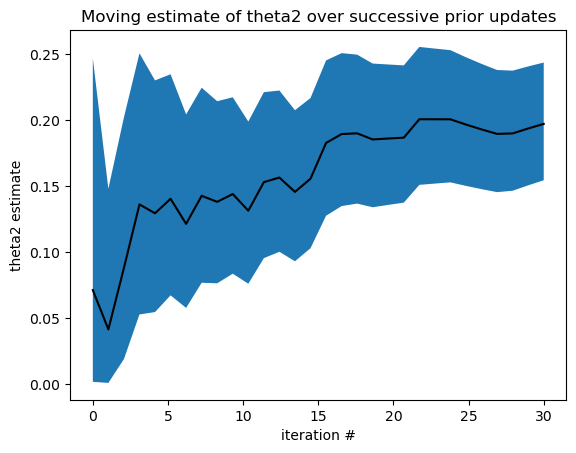

In [35]:
alpha_prior = np.array([1, 2, 1])
dir_prior = stats.dirichlet(alpha = alpha_prior)

# from Dr. Schwartz's provided code ----------------------
# make coordinate matrix
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

dir_prior_densities = dir_prior.pdf(p.T)

# https://plotly.com/python/ternary-contour/Links to an external site. 
fig_prior = ff.create_ternary_contour(p.T, dir_prior_densities,
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
fig_prior.update_layout(title = "Ternary plot of prior distribution" + str(0))
fig_prior.show('png')
# -----------------------------------------

#iteratively use given data from multinomial likelihood sample to estimate our specified theta's (0.1, 0.7, 0.2)
alpha_post = alpha_prior
post_means = np.zeros((len(mult3_samp), 3))
post_CIs = np.zeros((len(mult3_samp), 3), dtype=object)
for i in range(len(mult3_samp)):
    alpha_post += mult3_samp[i]
    dir_post = stats.dirichlet(alpha_post) 
    post_means[i, :] = alpha_post/np.sum(alpha_post)
    marg0 = stats.beta(alpha_post[0], alpha_post[1] + alpha_post[2])
    marg1 = stats.beta(alpha_post[1], alpha_post[0] + alpha_post[2])
    marg2 = stats.beta(alpha_post[2], alpha_post[1] + alpha_post[0])
    post_CIs[i, :] = [(marg0.ppf(0.025), marg0.ppf(0.975)), 
                              (marg1.ppf(0.025), marg1.ppf(0.975)),
                              (marg2.ppf(0.025), marg2.ppf(0.975))]
    if i%(len(mult3_samp)/10) == 0 or i == (len(mult3_samp) - 1):
        dir_post_densities = dir_post.pdf(p.T)
        fig_post = ff.create_ternary_contour(p.T, dir_post_densities,
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
        fig_post.update_layout(title = "Ternary plot of posterior distribution" + str(i + 1))
        fig_post.show('png')
    

x = np.linspace(0, len(mult3_samp), len(mult3_samp))

for i in range(3):
    plt.plot(x, post_means[:,i], 'k-')
    lowerCI = [x[0] for x in post_CIs[:,i]]
    upperCI = [x[1] for x in post_CIs[:,i]]
    plt.fill_between(x, lowerCI, upperCI)
    plt.title("Moving estimate of theta" + str(i) + " over successive prior updates")
    plt.xlabel("iteration #")
    plt.ylabel("theta" + str(i) + " estimate")
    plt.show()
    




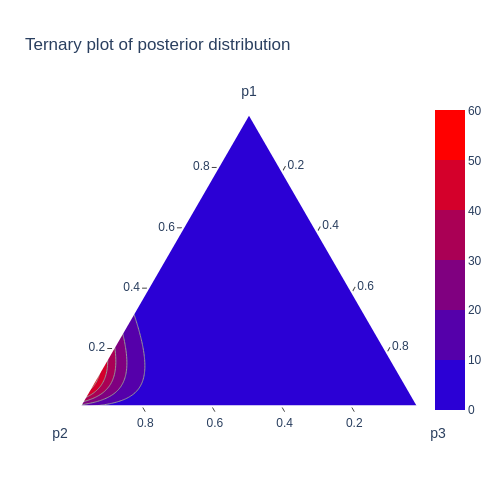